## 싸인 함수 회귀분석 (Sine Regression)

#### Package Import

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) 

2.1.0


In [12]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())



[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10286876378441314316
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 5347291812985513139
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 3875146133136539022
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14941647668
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7668906492040624163
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5"
]


## 데이터 생성

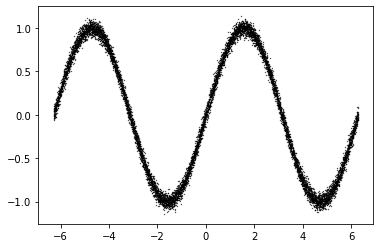

In [2]:
# generate the data
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None] #
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs),1])

plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

## 모델 정의
Q. 모델 생성 코드를 작성하시오.
1. __init()__ 함수 : 가중치와 편향의 변수 선언
1. __call()__ 함수 : 각 계층 별로 가중 합산과 활성 함수 실행 코드를 작성하시오.

In [30]:
class Model(tf.Module):
    def __init__(self):
        # create variables
        initializer = tf.initializers.GlorotUniform()
        W0 = tf.Variable(initializer(shape=[1, 20]), dtype=tf.float32, name='W0')
        W1 = tf.Variable(initializer(shape=[20, 20]), dtype=tf.float32, name='W1')
        W2 = tf.Variable(initializer(shape=[20, 1]), dtype=tf.float32, name='W2')

        b0 = tf.Variable(tf.zeros(shape=[20]),dtype = tf.float32, name='b0')
        b1 = tf.Variable(tf.zeros(shape=[20]),dtype = tf.float32, name='b1')
        b2 = tf.Variable(tf.zeros(shape=[1]),dtype = tf.float32, name='b2')

        self.weights = [W0, W1, W2]
        self.biases = [b0, b1, b2]
        self.activations = [tf.nn.relu, tf.nn.relu, None]
    
    def __call__(self, input):
        x = input
        for W, b, activation in zip(self.weights, self.biases, self.activations):
            # affine transformation (Hint : tf. matmul를 이용해서 작성)
            x = tf.matmul(x,W)+b
            # activation
            if activation is not None:
                x = activation(x)
        return x

## 모델 훈련
Q. GradientTape 방식으로 훈련 코드를 작성하시오.

In [31]:
model = Model()
optimizer = tf.optimizers.Adam() # create optimizer

# run training
batch_size = 32
for training_step in range(10000):
    # get a random subset of the training data
    indices = np.random.randint(low=0, high=len(inputs), size=batch_size)
    input_batch = tf.Variable(inputs[indices], dtype=tf.float32, name='input')
    output_batch = tf.Variable(outputs[indices], dtype=tf.float32, name='output')
    
    with tf.GradientTape() as tape:
        output_pred = model(input_batch)
        # mean squared loss (Hint : tf.reduce_mean와 tf.square를 이용해서 작성)
        mse = tf.reduce_mean((0.5)*tf.square(output_batch-output_pred))
        # gradient 계산 (Hint : tape.gradient() 사용)
        grads  = tape.gradient(mse,model.trainable_variables)
        # parameter update (Hint : optimizer.apply_gradients() 사용)
        optimizer.apply_gradients(zip(grads,model.trainable_variables))
        
    if training_step % 1000 == 0:
        print('{0:04d} mse: {1:.3f}'.format(training_step, mse))

0000 mse: 0.061
1000 mse: 0.002
2000 mse: 0.001
3000 mse: 0.001
4000 mse: 0.000
5000 mse: 0.000
6000 mse: 0.000
7000 mse: 0.000
8000 mse: 0.000
9000 mse: 0.000


## 테스트

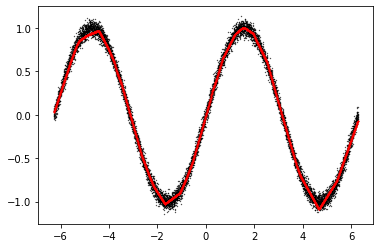

In [32]:
test_input = tf.Variable(inputs, dtype=tf.float32, name='input')
test_output = tf.Variable(outputs, dtype=tf.float32, name='Output')
test_output_pred = model(test_input)

plt.scatter(inputs[:, 0], test_output[:, 0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:, 0], test_output_pred[:, 0], c='r', marker='o', s=0.1)